In [37]:
import pandas as pd
import csv
import os
import json
import numpy as np
from citipy import citipy
import requests
import matplotlib.pyplot as plt
import plotly.express as px

In [38]:
results_df = pd.read_csv("WeatherPy/results.csv")
results_df

,Unnamed: 0,City,Country,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,0,Onguday,RU,1496130,50.7500,86.1500,23.76,85,1.57,100
1,1,Zhangye,CN,1785036,38.9342,100.4517,14.65,75,1.50,0
2,2,Pisco,PE,3932145,-13.7000,-76.2167,75.20,73,5.75,0
3,3,Pevek,RU,2122090,69.7008,170.3133,-29.07,86,5.95,89
4,4,Brae,GB,2654970,60.3964,-1.3530,41.00,87,18.41,90
...,...,...,...,...,...,...,...,...,...,...
690,690,Imeni Poliny Osipenko,RU,2023584,52.4201,136.4853,-26.75,86,4.18,75
691,691,Ndjolé,GA,2397674,-0.1783,10.7649,75.60,92,2.48,100
692,692,Yerbogachën,RU,2012956,61.2767,108.0108,-24.30,85,9.55,100
693,693,‘Āhuimanu,US,5856516,21.4447,-157.8378,73.40,83,31.07,90


In [39]:
results_df_filtered = results_df[(results_df["Max Temp"] <80) & (results_df["Max Temp"] >70) & (results_df["Wind Speed"] <10) & (results_df["Cloudiness"] == 0)]
results_df_filtered

,Unnamed: 0,City,Country,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
2,2,Pisco,PE,3932145,-13.7000,-76.2167,75.20,73,5.75,0
8,8,Entre Rios,BR,3464100,-11.9419,-38.0844,72.07,82,5.19,0
18,18,Malakal,SS,370737,9.5334,31.6605,79.03,24,7.61,0
95,95,Filingué,NE,2444995,14.3521,3.3168,73.51,20,8.84,0
129,129,Alice Springs,AU,2077895,-23.7000,133.8833,77.00,28,8.05,0
188,188,Bandiagara,ML,2460489,14.3501,-3.6104,75.20,33,4.61,0
200,200,Am Timan,TD,245338,11.0297,20.2827,72.10,21,5.23,0
258,258,Caborca,MX,3996893,30.5838,-111.1010,79.00,12,7.00,0
319,319,Minas,UY,3441665,-34.3759,-55.2377,73.40,64,5.75,0
334,334,Caravelas,BR,3466980,-17.7125,-39.2481,77.20,78,7.05,0


In [40]:
hotels_df=results_df_filtered.copy()
hotels_df["Hotel Name"]= ""
hotels_df

,Unnamed: 0,City,Country,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness,Hotel Name
2,2,Pisco,PE,3932145,-13.7000,-76.2167,75.20,73,5.75,0,
8,8,Entre Rios,BR,3464100,-11.9419,-38.0844,72.07,82,5.19,0,
18,18,Malakal,SS,370737,9.5334,31.6605,79.03,24,7.61,0,
95,95,Filingué,NE,2444995,14.3521,3.3168,73.51,20,8.84,0,
129,129,Alice Springs,AU,2077895,-23.7000,133.8833,77.00,28,8.05,0,
188,188,Bandiagara,ML,2460489,14.3501,-3.6104,75.20,33,4.61,0,
200,200,Am Timan,TD,245338,11.0297,20.2827,72.10,21,5.23,0,
258,258,Caborca,MX,3996893,30.5838,-111.1010,79.00,12,7.00,0,
319,319,Minas,UY,3441665,-34.3759,-55.2377,73.40,64,5.75,0,
334,334,Caravelas,BR,3466980,-17.7125,-39.2481,77.20,78,7.05,0,


In [41]:
os.chdir("../python-api-challenge")

In [42]:
from config import google_key
from config import mapbox_token

In [43]:
# understaning index,row within a loop - 
# this is needed here because we need to grab the first hotel return from the google api and populate
# the hotel_df and indexing that dataframe will be easier with "index" within the loop
for index,row in hotels_df.iterrows():
    lat=row["Latitude"]
    lng=row["Longitude"]
    name_address=requests.get("https://maps.googleapis.com/maps/api/place/nearbysearch/json?", params={
            "location": f"{lat},{lng}",
            "radius": 5000,
            "types": "lodging",
            "key": google_key
            })
    name_address=name_address.json()
    try:
        
        hotels_df.loc[index,"Hotel Name"]=name_address["results"][0]["name"]
    except (KeyError, IndexError):
        print("missing field - skipping")
    

missing field - skipping
missing field - skipping


In [44]:
hotels_df

,Unnamed: 0,City,Country,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness,Hotel Name
2,2,Pisco,PE,3932145,-13.7000,-76.2167,75.20,73,5.75,0,Hotel San Isidro Oficial
8,8,Entre Rios,BR,3464100,-11.9419,-38.0844,72.07,82,5.19,0,Jambalaya Pousada
18,18,Malakal,SS,370737,9.5334,31.6605,79.03,24,7.61,0,Nile Palace Hotel
95,95,Filingué,NE,2444995,14.3521,3.3168,73.51,20,8.84,0,
129,129,Alice Springs,AU,2077895,-23.7000,133.8833,77.00,28,8.05,0,Desert Palms Alice Springs
188,188,Bandiagara,ML,2460489,14.3501,-3.6104,75.20,33,4.61,0,Hotel de la Falaise
200,200,Am Timan,TD,245338,11.0297,20.2827,72.10,21,5.23,0,Palais du chef Canton Salamt
258,258,Caborca,MX,3996893,30.5838,-111.1010,79.00,12,7.00,0,Hotel Los Lagos
319,319,Minas,UY,3441665,-34.3759,-55.2377,73.40,64,5.75,0,Hotel Minas
334,334,Caravelas,BR,3466980,-17.7125,-39.2481,77.20,78,7.05,0,Pousada dos Navegantes


In [45]:
hotels_df.to_csv("VacationPy/hotels.csv")

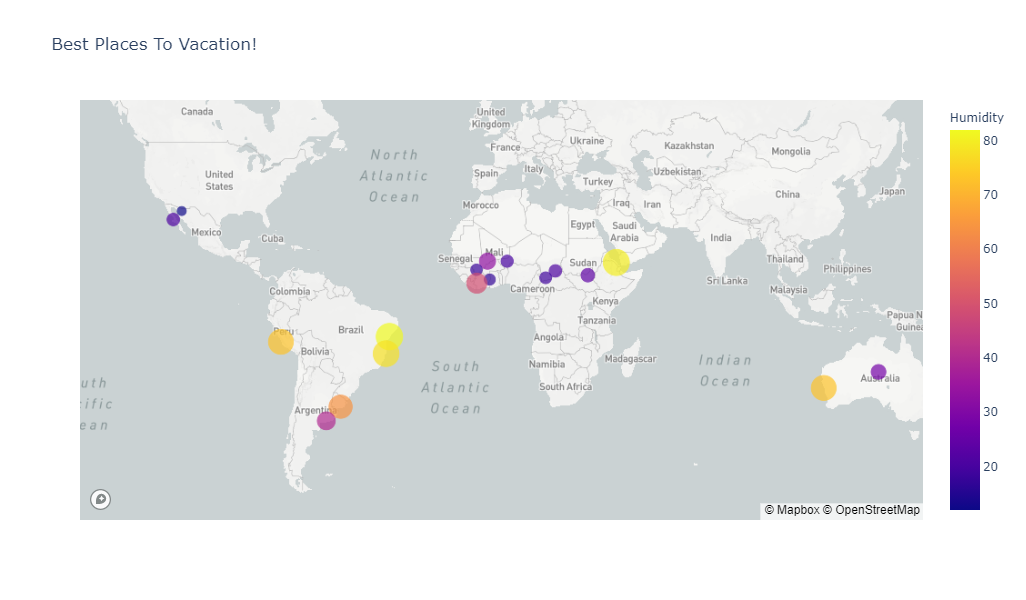

In [48]:
px.set_mapbox_access_token(mapbox_token)
fig_map_hotels= px.scatter_mapbox(
    hotels_df,
    lat="Latitude",
    lon="Longitude",
    title="Best Places To Vacation!",
    color="Humidity",
    size="Humidity",
    hover_data=["Hotel Name", "City", "Country" ],
    zoom=1,
    height=600,
    width=1000,
)
fig_map_hotels.write_image("figures/hotel_map.png")
fig_map_hotels.show()